In [1]:
import copy
from argparse import Namespace
import numpy as np
import matplotlib.pyplot as plt

from bax.models.simple_gp import SimpleGp
from bax.alg.algorithms import SortOutputs
from bax.acq.acqoptimize import AcqOptimizer

import neatplot
neatplot.set_style('fonts')

In [2]:
# Set random seed
seed = 11
np.random.seed(seed)

In [3]:
# Set function
f = lambda x: 4 * np.sin(x[0])/x[0]

# Set data for model
data = Namespace()
data.x = []
data.y = [f(x) for x in data.x]

# Set model as a GP
gp_params = {'ls': 1.0, 'alpha': 1.0, 'sigma': 1e-2}
model = SimpleGp(gp_params)
model.set_data(data)

# Set arrays
min_x = -10.0
max_x = 10.0
len_path = 10
x_rand = np.random.uniform(min_x, max_x, len_path)
x_path = [[x] for x in x_rand] # input points the algorithm will execute on


# Set algorithm
algo = SortOutputs({'x_path': x_path})

exe_path_true = Namespace(x=x_path, y=[f(x) for x in x_path]) # not seen by algorithm
output_true = algo.get_output_from_exe_path(exe_path_true)

x_test = [[x] for x in np.linspace(min_x, max_x, 500)] # input points to maximize acquisition function over

# Set "true function"
x_true = [[x] for x in np.linspace(min_x, max_x, 200)] # points to plot true execution path
y_true = [f(x) for x in x_true]

*[INFO] SimpleGp with params=Namespace(alpha=1.0, kernel=<function kern_exp_quad at 0x7f51fb2604c0>, ls=1.0, sigma=0.01)
*[INFO] SortOutputs with params=Namespace(name='SortOutputs')


In [4]:
output_true

array([3, 6, 1, 0, 8, 9, 4, 2, 5, 7])

In [5]:
np.argsort(output_true)

array([3, 2, 7, 0, 6, 8, 1, 9, 4, 5])

In [6]:
def count_inversions(output, output_true):
    # outputs are results of np.argsort
    assert len(output) == len(output_true)
    #true_ranks = {v:k for k,v in dict(enumerate(output_true)).items()}
    true_ranks = np.argsort(output_true)
    
    # count number of inversions (naive quadratic alg)
    inversions = 0
    for i in range(len(output)):
        for j in range(i + 1, len(output)):
            # note rank x_i < rank x_j according to output
            true_rank_i = true_ranks[output[i]]
            true_rank_j = true_ranks[output[j]]
            if true_rank_i > true_rank_j:
                inversions += 1
    return inversions

In [7]:
def get_ranks(output):
    # output is result of np.argsort
    #ranks = [-1] * len(output)
    #for rank, i in enumerate(output):
    #    ranks[i] = rank
    #return ranks
    return np.argsort(output, axis=-1)

*[INFO] AcqOptimizer with params=Namespace(n_path=100, name='AcqOptimizer', opt_str='rs', viz_acq=True)
*[TIME] [Sample 100 execution paths] Elapsed: 0.26 seconds
*[TIME] [Pre-compute acquisition at 500 test points] Elapsed: 0.75 seconds
*[INFO] AcqFunction with params=Namespace(acq_str='pe', name='AcqFunction')
Acq optimizer x_next = [-0.26052104208416793]
Finished iter i = 0
Saved figure gp_test_10_0.pdf
Saved figure gp_test_10_0.png


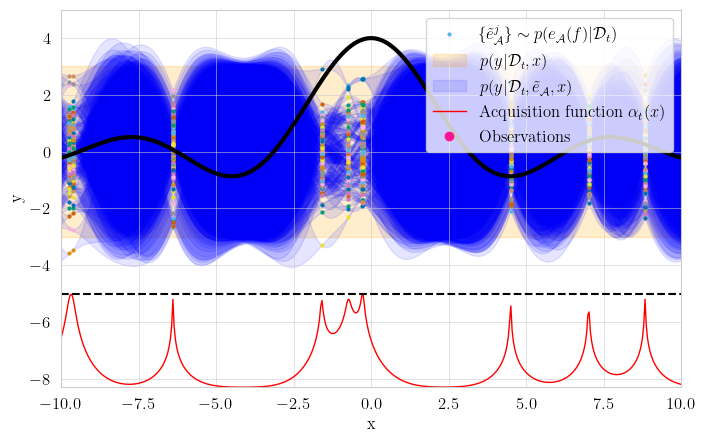

Average number of inversions: 21.82
Maximum possible inversions: 45.0


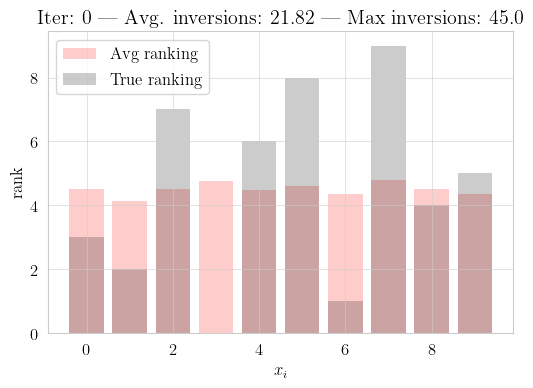

Press enter to continue (any other key to stop):  


*[INFO] SimpleGp with params=Namespace(alpha=1.0, kernel=<function kern_exp_quad at 0x7f51fb2604c0>, ls=1.0, sigma=0.01)
*[INFO] AcqOptimizer with params=Namespace(n_path=100, name='AcqOptimizer', opt_str='rs', viz_acq=True)
*[TIME] [Sample 100 execution paths] Elapsed: 0.25 seconds
*[TIME] [Pre-compute acquisition at 500 test points] Elapsed: 0.73 seconds
*[INFO] AcqFunction with params=Namespace(acq_str='pe', name='AcqFunction')
Acq optimizer x_next = [-9.67935871743487]
Finished iter i = 1
Saved figure gp_test_10_1.pdf
Saved figure gp_test_10_1.png


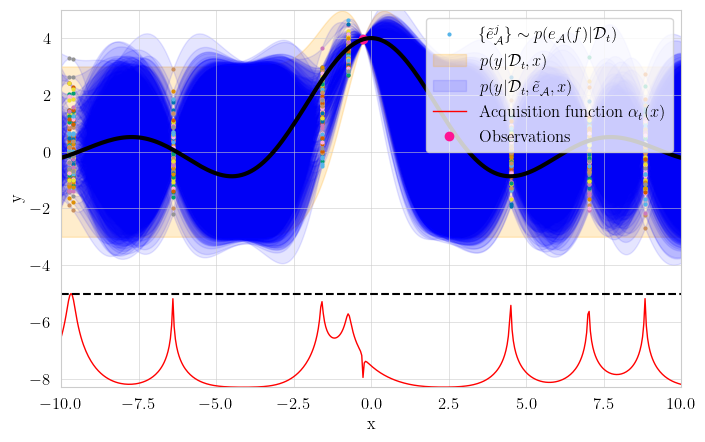

Average number of inversions: 8.7
Maximum possible inversions: 45.0


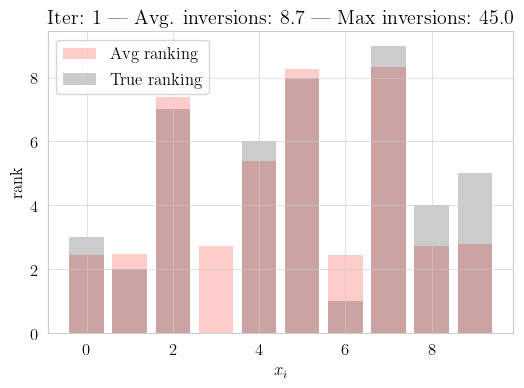

Press enter to continue (any other key to stop):  


*[INFO] SimpleGp with params=Namespace(alpha=1.0, kernel=<function kern_exp_quad at 0x7f51fb2604c0>, ls=1.0, sigma=0.01)
*[INFO] AcqOptimizer with params=Namespace(n_path=100, name='AcqOptimizer', opt_str='rs', viz_acq=True)
*[TIME] [Sample 100 execution paths] Elapsed: 0.25 seconds
*[TIME] [Pre-compute acquisition at 500 test points] Elapsed: 0.62 seconds
*[INFO] AcqFunction with params=Namespace(acq_str='pe', name='AcqFunction')
Acq optimizer x_next = [8.837675350701403]
Finished iter i = 2
Saved figure gp_test_10_2.pdf
Saved figure gp_test_10_2.png


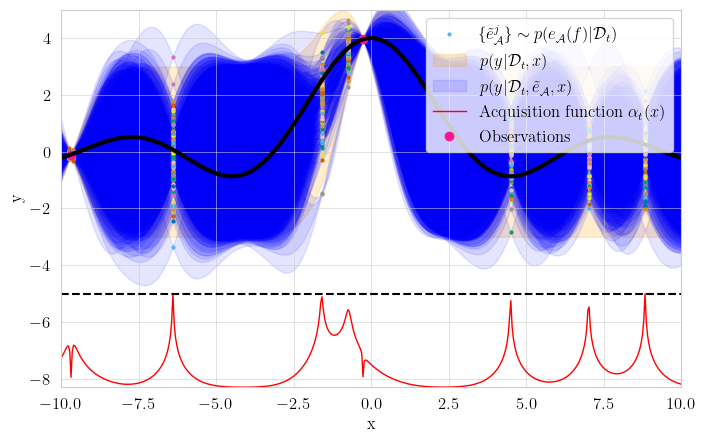

Average number of inversions: 8.68
Maximum possible inversions: 45.0


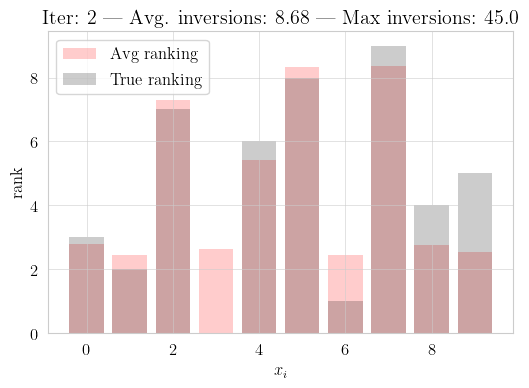

Press enter to continue (any other key to stop):  


*[INFO] SimpleGp with params=Namespace(alpha=1.0, kernel=<function kern_exp_quad at 0x7f51fb2604c0>, ls=1.0, sigma=0.01)
*[INFO] AcqOptimizer with params=Namespace(n_path=100, name='AcqOptimizer', opt_str='rs', viz_acq=True)
*[TIME] [Sample 100 execution paths] Elapsed: 0.25 seconds
*[TIME] [Pre-compute acquisition at 500 test points] Elapsed: 0.67 seconds
*[INFO] AcqFunction with params=Namespace(acq_str='pe', name='AcqFunction')
Acq optimizer x_next = [-6.3927855711422845]
Finished iter i = 3
Saved figure gp_test_10_3.pdf
Saved figure gp_test_10_3.png


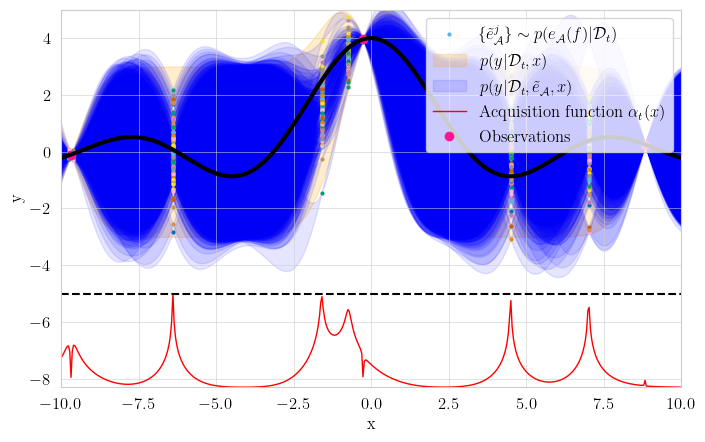

Average number of inversions: 7.5
Maximum possible inversions: 45.0


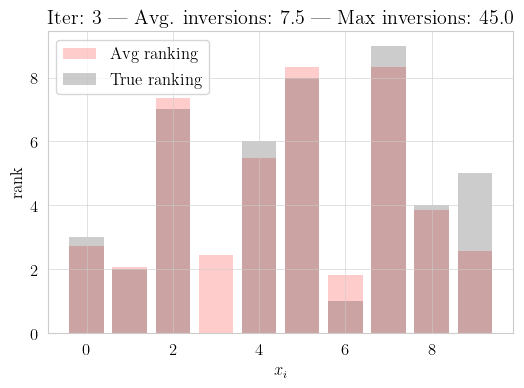

Press enter to continue (any other key to stop):  


*[INFO] SimpleGp with params=Namespace(alpha=1.0, kernel=<function kern_exp_quad at 0x7f51fb2604c0>, ls=1.0, sigma=0.01)
*[INFO] AcqOptimizer with params=Namespace(n_path=100, name='AcqOptimizer', opt_str='rs', viz_acq=True)
*[TIME] [Sample 100 execution paths] Elapsed: 0.28 seconds
*[TIME] [Pre-compute acquisition at 500 test points] Elapsed: 0.55 seconds
*[INFO] AcqFunction with params=Namespace(acq_str='pe', name='AcqFunction')
Acq optimizer x_next = [-1.5831663326653302]
Finished iter i = 4
Saved figure gp_test_10_4.pdf
Saved figure gp_test_10_4.png


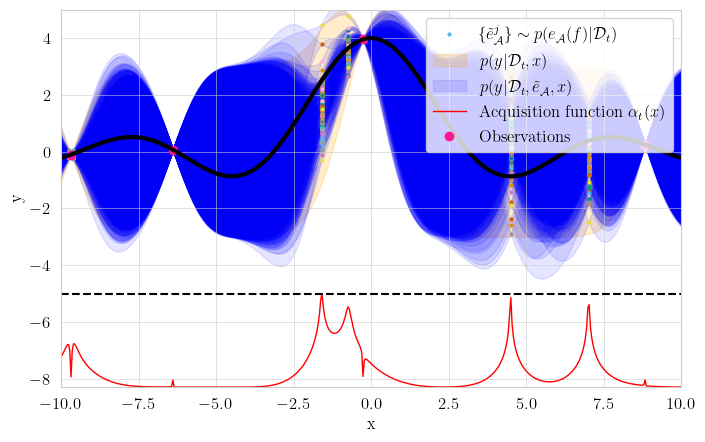

Average number of inversions: 6.55
Maximum possible inversions: 45.0


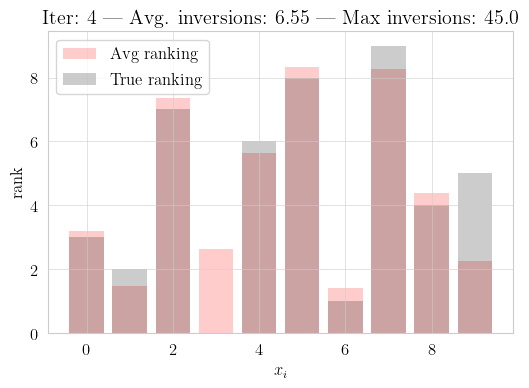

Press enter to continue (any other key to stop):  


*[INFO] SimpleGp with params=Namespace(alpha=1.0, kernel=<function kern_exp_quad at 0x7f51fb2604c0>, ls=1.0, sigma=0.01)
*[INFO] AcqOptimizer with params=Namespace(n_path=100, name='AcqOptimizer', opt_str='rs', viz_acq=True)
*[TIME] [Sample 100 execution paths] Elapsed: 0.27 seconds
*[TIME] [Pre-compute acquisition at 500 test points] Elapsed: 0.73 seconds
*[INFO] AcqFunction with params=Namespace(acq_str='pe', name='AcqFunction')
Acq optimizer x_next = [4.509018036072144]
Finished iter i = 5
Saved figure gp_test_10_5.pdf
Saved figure gp_test_10_5.png


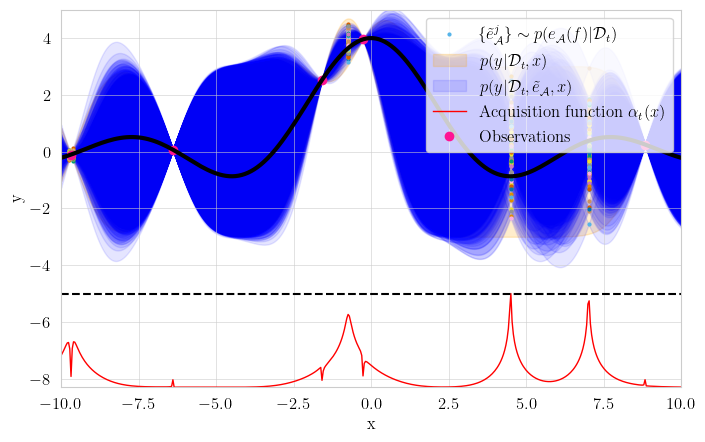

Average number of inversions: 6.4
Maximum possible inversions: 45.0


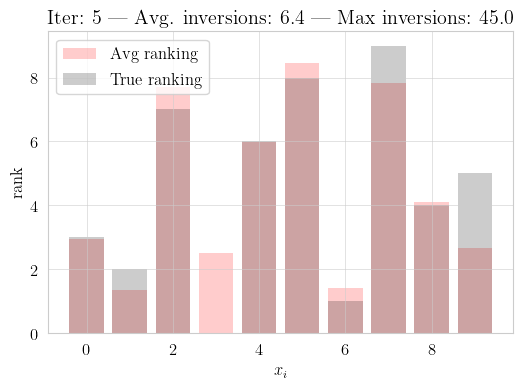

Press enter to continue (any other key to stop):  


*[INFO] SimpleGp with params=Namespace(alpha=1.0, kernel=<function kern_exp_quad at 0x7f51fb2604c0>, ls=1.0, sigma=0.01)
*[INFO] AcqOptimizer with params=Namespace(n_path=100, name='AcqOptimizer', opt_str='rs', viz_acq=True)
*[TIME] [Sample 100 execution paths] Elapsed: 0.27 seconds
*[TIME] [Pre-compute acquisition at 500 test points] Elapsed: 0.74 seconds
*[INFO] AcqFunction with params=Namespace(acq_str='pe', name='AcqFunction')
Acq optimizer x_next = [7.034068136272545]
Finished iter i = 6
Saved figure gp_test_10_6.pdf
Saved figure gp_test_10_6.png


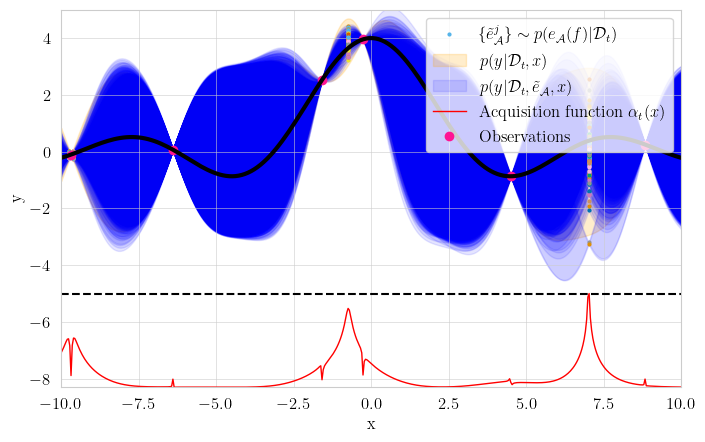

Average number of inversions: 4.21
Maximum possible inversions: 45.0


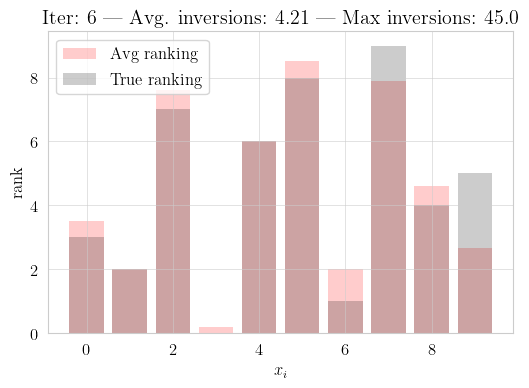

Press enter to continue (any other key to stop):  


*[INFO] SimpleGp with params=Namespace(alpha=1.0, kernel=<function kern_exp_quad at 0x7f51fb2604c0>, ls=1.0, sigma=0.01)
*[INFO] AcqOptimizer with params=Namespace(n_path=100, name='AcqOptimizer', opt_str='rs', viz_acq=True)
*[TIME] [Sample 100 execution paths] Elapsed: 0.29 seconds
*[TIME] [Pre-compute acquisition at 500 test points] Elapsed: 0.65 seconds
*[INFO] AcqFunction with params=Namespace(acq_str='pe', name='AcqFunction')
Acq optimizer x_next = [-0.7414829659318638]
Finished iter i = 7
Saved figure gp_test_10_7.pdf
Saved figure gp_test_10_7.png


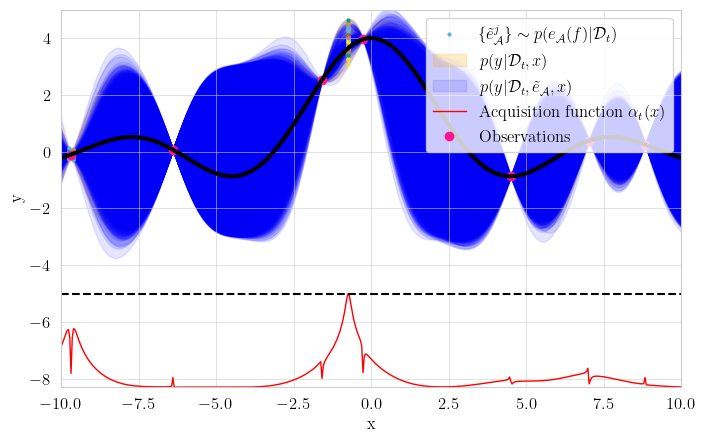

Average number of inversions: 2.06
Maximum possible inversions: 45.0


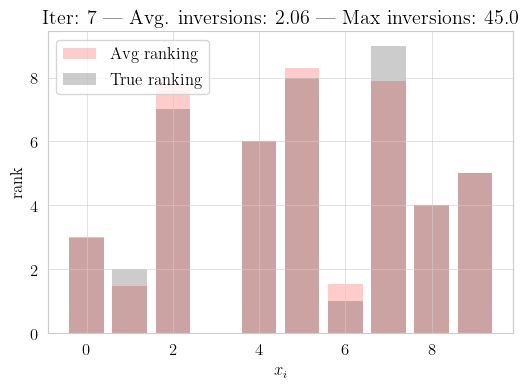

Press enter to continue (any other key to stop):  


*[INFO] SimpleGp with params=Namespace(alpha=1.0, kernel=<function kern_exp_quad at 0x7f51fb2604c0>, ls=1.0, sigma=0.01)
*[INFO] AcqOptimizer with params=Namespace(n_path=100, name='AcqOptimizer', opt_str='rs', viz_acq=True)
*[TIME] [Sample 100 execution paths] Elapsed: 0.28 seconds
*[TIME] [Pre-compute acquisition at 500 test points] Elapsed: 0.63 seconds
*[INFO] AcqFunction with params=Namespace(acq_str='pe', name='AcqFunction')
Acq optimizer x_next = [-9.599198396793588]
Finished iter i = 8
Saved figure gp_test_10_8.pdf
Saved figure gp_test_10_8.png


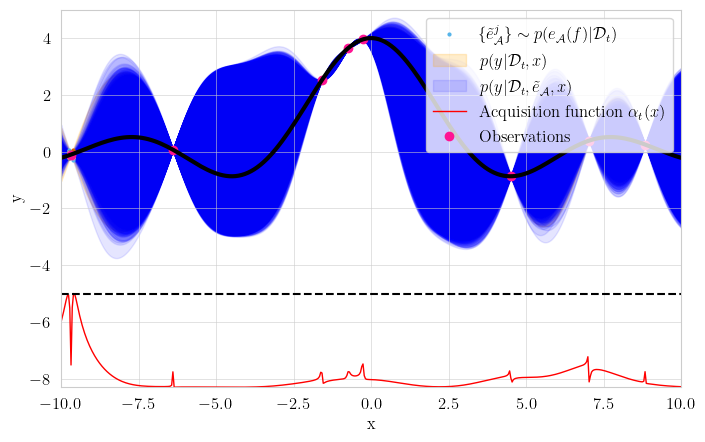

Average number of inversions: 1.01
Maximum possible inversions: 45.0


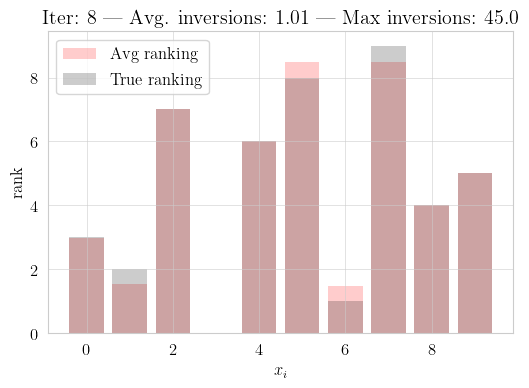

In [ ]:
# BAX iterations
n_iter = 40

for i in range(n_iter):
    # Plot setup
    fig = plt.figure(figsize=(8, 5))
    plt.xlim([min_x, max_x])
    plt.ylim([-5.0, 5.0])
    plt.xlabel('x')
    plt.ylabel('y')

    # Optimize acquisition function
    acqopt = AcqOptimizer({'x_test': x_test})
    x_next = acqopt.optimize(model, algo)
    print(f'Acq optimizer x_next = {x_next}')
    print(f'Finished iter i = {i}')

    # Plot true function
    plt.plot(x_true, y_true, color='k', linewidth=3)

    # Show plot
    neatplot.save_figure(f'gp_test_10_{i}')
    plt.show()
            
    outputs = np.stack(acqopt.sample_outputs(model, algo, acqopt.params.n_path), axis=0)
    inversions = [count_inversions(output, output_true) for output in outputs]
    avg_inversions = np.mean(np.array(inversions))
    print(f"Average number of inversions: {avg_inversions}")
    print(f"Maximum possible inversions: {len_path * (len_path - 1) / 2}")
    
    # plot ranking distribution
    fig, ax = plt.subplots()
    ax.bar(np.arange(len(output_true)), get_ranks(outputs).mean(0), alpha=0.2, color='r', label="Avg ranking")
    ax.bar(np.arange(len(output_true)), get_ranks(output_true), color='k', alpha=0.2, label="True ranking")
    ax.set(xlabel=r"$x_i$", ylabel="rank")
    ax.set(title=f"Iter: {i} --- Avg. inversions: {avg_inversions} --- Max inversions: {len_path * (len_path - 1) / 2}")
    ax.legend()
    plt.show()

    inp = input('Press enter to continue (any other key to stop): ')
    if inp:
        break
    plt.close()

    # Query function, update data
    y_next = f(x_next)
    data.x.append(x_next)
    data.y.append(y_next)

    # Update model
    model = SimpleGp(gp_params)
    model.set_data(data)